In [1]:
import os 
import rasterio as rio
import rasterio.plot as plot
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_dir = '/Users/corey/Documents/Research/CHART/data'
fig_dir = '/Users/corey/Documents/Research/CHART/figures'

In [3]:
df = pd.read_json(os.path.join(data_dir, 'test_time_series/GHAASBasin9.json'))

In [4]:
df = pd.concat([df[0], df[1].apply(pd.Series)], axis=1)

In [5]:
df['dates'] = pd.to_datetime(df[0], format = '%j') + pd.DateOffset(years = 118, months=4)

In [6]:
df.set_index('dates', inplace=True)


In [7]:
cum = df[['VV_first', 'VV_last']].cumsum()

dif = pd.DataFrame(cum['VV_first'] - cum['VV_last'])/1e6
dif.rename(columns = {0: 'area'}, inplace=True)

<AxesSubplot:xlabel='dates'>

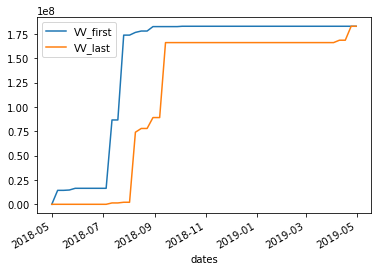

In [66]:
cum.plot()


In [10]:

dif.index[0]
river9 = river9.loc['2018-05-01': '2019-05-01']

In [279]:
dif.index[0]
#river9.index[0]

Timestamp('2018-05-01 00:00:00')

In [ ]:
wbm = pd.read_csv(os.path.join(data_dir, '/Users/corey/Documents/Research/CHART/data/test_time_series', 'basinmouth_discharge_monthly_terra-wbmsed-prist_01min_w.csv'))

river9 = wbm[wbm['sampleid'] == 9]
river9 = river9.drop(['FID', 'geom', 'id'], axis=1)
river9.set_index('sampleid', inplace=True)

# parse columns into dates

dates = river9.columns
river9.columns = pd.to_datetime(dates.str.replace('m', ""))
river9 = river9.T

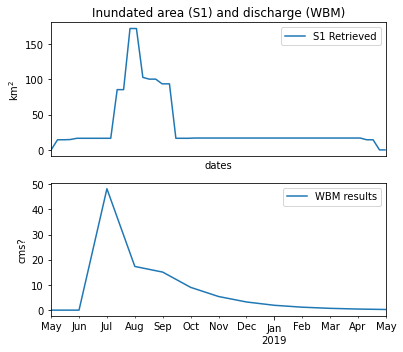

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

dif.plot(ax=ax[0])
ax[0].set_title('Inundated area (S1) and discharge (WBM)')
ax[0].set_ylabel('km$^2$')
ax[0].legend(['S1 Retrieved'])


ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax[0].set_xlim('2018-05-01', '2019-05-01')
ax[1].set_xlim('2018-05-01', '2019-05-01')

river9.plot(ax=ax[1])
ax[1].legend(['WBM results'])
ax[1].set_ylabel('cms?')
#ax2.legend(['WBM'], loc='upper left')

plt.savefig(os.path.join(fig_dir, 'inundated_area_GHAASBasin9.png'), dpi=300, facecolor='white')

In [55]:
river9.index[0]

Timestamp('2018-05-01 00:00:00')

In [12]:
import rasterio as rio

In [26]:
p = '/Users/corey/Documents/Research/CHART/data/ex_data'

june18 = rio.open(os.path.join(p, 'june_2018.tif'))
july18 = rio.open(os.path.join(p, 'july_2018.tif'))
aug18 = rio.open(os.path.join(p, 'aug_2018.tif'))
sep18 = rio.open(os.path.join(p, 'sep_2018.tif'))
oct18 = rio.open(os.path.join(p, 'oct_2018.tif'))
nov18 = rio.open(os.path.join(p, 'nov_2018.tif'))
dec18 = rio.open(os.path.join(p, 'dec_2018.tif'))
jan19 = rio.open(os.path.join(p, 'jan_2019.tif'))
feb19 = rio.open(os.path.join(p, 'feb_2019.tif'))
mar19 = rio.open(os.path.join(p, 'march_2019.tif'))
apr19 = rio.open(os.path.join(p, 'apr_2019.tif'))

june18_c = rio.open(os.path.join(p, 'june_2018_c.tif'))
july18_c = rio.open(os.path.join(p, 'july_2018_c.tif'))
aug18_c = rio.open(os.path.join(p, 'aug_2018_c.tif'))
sep18_c = rio.open(os.path.join(p, 'sep_2018_c.tif'))
oct18_c = rio.open(os.path.join(p, 'oct_2018_c.tif'))
nov18_c = rio.open(os.path.join(p, 'nov_2018_c.tif'))
dec18_c = rio.open(os.path.join(p, 'dec_2018_c.tif'))
jan19_c = rio.open(os.path.join(p, 'jan_2019_c.tif'))
feb19_c = rio.open(os.path.join(p, 'feb_2019_c.tif'))
mar19_c = rio.open(os.path.join(p, 'march_2019_c.tif'))
apr19_c = rio.open(os.path.join(p, 'apr_2019_c.tif'))

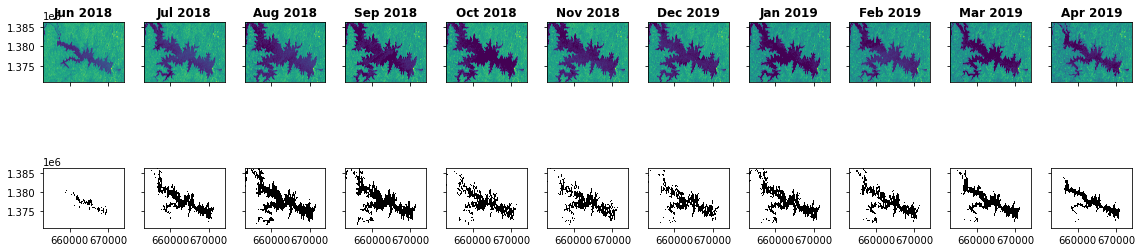

In [37]:
fig, ax = plt.subplots(2, 11, figsize=(16,5), sharex = True, sharey=True)

plot.show(june18.read(1), ax=ax[0,0], vmin=-25, vmax = 0, transform = june18.transform, title='Jun 2018')
plot.show(july18.read(1), ax=ax[0,1], vmin=-25, vmax = 0, transform = june18.transform, title='Jul 2018')
plot.show(aug18.read(1), ax=ax[0,2], vmin=-25, vmax = 0, transform = june18.transform, title='Aug 2018')
plot.show(sep18.read(1), ax=ax[0,3], vmin=-25, vmax = 0, transform = june18.transform, title='Sep 2018')
plot.show(oct18.read(1), ax=ax[0,4], vmin=-25, vmax = 0, transform = june18.transform, title='Oct 2018')
plot.show(nov18.read(1), ax=ax[0,5], vmin=-25, vmax = 0, transform = june18.transform, title='Nov 2018')
plot.show(dec18.read(1), ax=ax[0,6], vmin=-25, vmax = 0, transform = june18.transform, title='Dec 2019')
plot.show(jan19.read(1), ax=ax[0,7], vmin=-25, vmax = 0, transform = june18.transform, title='Jan 2019')
plot.show(feb19.read(1), ax=ax[0,8], vmin=-25, vmax = 0, transform = june18.transform, title='Feb 2019')
plot.show(mar19.read(1), ax=ax[0,9], vmin=-25, vmax = 0, transform = june18.transform, title='Mar 2019')
plot.show(apr19.read(1), ax=ax[0,10], vmin=-25, vmax = 0, transform = june18.transform, title='Apr 2019')

plot.show(june18_c.read(1), ax=ax[1,0], vmin = 0, vmax = 1, transform = june18_c.transform, cmap="Greys")
plot.show(july18_c.read(1), ax=ax[1,1],vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(aug18_c.read(1), ax=ax[1,2], vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(sep18_c.read(1), ax=ax[1,3], vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(oct18_c.read(1), ax=ax[1,4],vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(nov18_c.read(1), ax=ax[1,5], vmin = 0, vmax = 1, transform = june18_c.transform, cmap="Greys")
plot.show(dec18_c.read(1), ax=ax[1,6], vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(jan19_c.read(1), ax=ax[1,7], vmin = 0, vmax = 1, transform = june18_c.transform, cmap="Greys")
plot.show(feb19_c.read(1), ax=ax[1,8], vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(mar19_c.read(1), ax=ax[1,9], vmin = 0, vmax = 1,  transform = june18_c.transform, cmap="Greys")
plot.show(apr19_c.read(1), ax=ax[1,10], vmin = 0, vmax = 1, transform = june18_c.transform, cmap="Greys")
plt.tight_layout()
plt.savefig('example_results.png', dpi=300)